In [50]:
import numpy as np
import pandas as pd
from scipy import stats

In [89]:
df = pd.read_csv('problem,strategy.csv')
#df.rename(columns={'risk':'Gang_Embeddedness'}, inplace=True)
#df.head()

In [117]:
df = df[df['risk'].notna()]

In [118]:
len(df)

450

In [119]:
intake = df[df['admin']==1]
retest = df[df['admin']==2]

In [120]:
intake['ID'].value_counts()

Hollenbeck 2-20-45-2    3
Southwest 1-15-298-1    3
Southwest 1-15-290-1    3
Southwest 1-15-349-2    2
Southwest 1-15-289-1    2
                       ..
Northeast-20-162-3      1
Newton 2-23-245-1       1
Newton 1-17-226-1       1
Northeast-20-292-1      1
Southwest 2-23-90-2     1
Name: ID, Length: 166, dtype: int64

In [121]:
len(intake)

225

In [122]:
retest = retest.drop_duplicates(subset = ["ID"])
len(retest)

166

In [123]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

166

In [124]:
ids = retest['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)

166

In [125]:
intake = intake[intake['ID'].isin(unique_ids)]
len(intake)

166

In [126]:
ids = intake['ID'].tolist()
unique_ids = []
for x in ids:
    if x not in unique_ids:
        unique_ids.append(x)
len(unique_ids)

166

In [127]:
retest = retest[retest['ID'].isin(unique_ids)]
len(retest)

166

In [128]:
full = intake.append(retest)

In [129]:
len(full)

332

In [130]:
drop1 = intake[intake['risk'].isna()]['ID'].tolist()
drop2 = retest[retest['risk'].isna()]['ID'].tolist()
for x in drop2:
    drop1.append(x)

In [131]:
len(drop2)

0

In [132]:
intake = intake[~intake['ID'].isin(drop1)]
retest = retest[~retest['ID'].isin(drop1)]

In [133]:
len(retest)

166

In [134]:
len(intake)

166

In [135]:
full = intake.append(retest)

In [136]:
len(full)

332

In [26]:
stats.ttest_rel(intake['risk'], retest['risk'])

Ttest_relResult(statistic=8.095185971109368, pvalue=1.3048817586780185e-14)

In [27]:
intake['risk'].mean()

0.356256029246795

In [28]:
retest['risk'].mean()

-0.9984485071153849

In [29]:
intake.Strategy_Label.value_counts()

Mentorship for school/job readiness                  210
Substance abuse/Anger management/Life skill class     51
Engage in community service                           20
40 Developmental Assets program                       20
Counseling service                                    11
Name: Strategy_Label, dtype: int64

In [30]:
len(retest)

312

In [31]:
stats.ttest_rel(intake[intake['Strategy_Label']=='Mentorship for school/job readiness']['risk'], 
                retest[retest['Strategy_Label']=='Mentorship for school/job readiness']['risk'])

Ttest_relResult(statistic=5.564114990493025, pvalue=8.016388539193043e-08)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
full['admin'] = full['admin'].map({1: 'intake', 2: 'retest'})

In [34]:
full.to_csv('prob_stra_intake_retest.csv', index=False)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

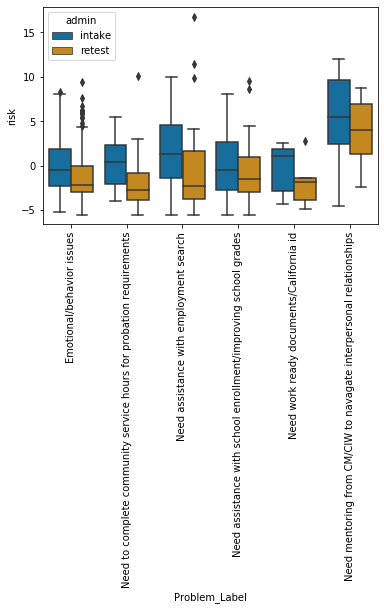

In [35]:


sns.boxplot(y='risk', x='Problem_Label', data=full, palette="colorblind",hue='admin')
plt.xticks(rotation=90)

In [36]:
intake.Problem_Label.value_counts()

Emotional/behavior issues                                              211
Need assistance with school enrollment/improving school grades          33
Need to complete community service hours for probation requirements     24
Need assistance with employment search                                  23
Need mentoring from CM/CIW to navagate interpersonal relationships      14
Need work ready documents/California id                                  7
Name: Problem_Label, dtype: int64

In [37]:
stats.ttest_rel(intake[intake['Problem_Label']=='Need mentoring from CM/CIW to navagate interpersonal relationships']['risk'], 
                retest[retest['Problem_Label']=='Need mentoring from CM/CIW to navagate interpersonal relationships']['risk'])

Ttest_relResult(statistic=1.3583751628803267, pvalue=0.1974508193818163)

In [38]:
#full['gang'] = full['gang'].fillna(0)
#full['family'] = full['family'].fillna(0)

In [39]:
intake[intake['Strategy_Label']=='get mentored for school/work']['risk'].mean()

nan

In [39]:
retest[retest['Strategy_Label']=='get mentored for school/work']['risk'].mean()

nan

In [40]:
stats.ttest_rel(intake[intake['Strategy_Label']=='Substance abuse/Anger management/Life skill class']['risk'], 
                retest[retest['Strategy_Label']=='Substance abuse/Anger management/Life skill class']['risk'])

Ttest_relResult(statistic=5.1200242445039965, pvalue=4.904511146458538e-06)

In [41]:
intake[intake['Strategy_Label']=='substance abuse/anger management/life skill']['risk'].mean()

nan

In [42]:
retest[retest['Strategy_Label']=='substance abuse/anger management/life skill']['risk'].mean()

nan

In [43]:
stats.ttest_rel(intake[intake['Strategy_Label']=='developmental asset']['risk'], 
                retest[retest['Strategy_Label']=='developmental asset']['risk'])

(nan, nan)

In [44]:
intake[intake['Strategy_Label']=='developmental asset']['risk'].mean()

nan

In [45]:
retest[retest['Strategy_Label']=='developmental asset']['risk'].mean()

nan

In [46]:
stats.ttest_rel(intake[intake['Strategy_Label']=='job readiness']['risk'], 
                retest[retest['Strategy_Label']=='job readiness']['risk'])  

(nan, nan)

In [47]:
intake[intake['Strategy_Label']=='job readiness']['risk'].mean()

nan

In [48]:
retest[retest['Strategy_Label']=='job readiness']['risk'].mean()

nan

In [49]:
stats.ttest_rel(intake[intake['Strategy_Label']=='Engage in community service']['risk'], 
                retest[retest['Strategy_Label']=='Engage in community service']['risk'])

Ttest_relResult(statistic=2.8674917334564425, pvalue=0.00985737402657642)

In [50]:
intake[intake['Strategy_Label']=='couseling service (employment etc)']['risk'].mean()

nan

In [51]:
retest[retest['Strategy_Label']=='couseling service (employment etc)']['risk'].mean()

nan

In [110]:
emo=pd.read_csv('emotion.csv')
emo=emo.drop(columns={'Unnamed: 0'})
emo=emo.rename(columns={'GRYD_ETO_ID':'ID'})

In [111]:
emo

,ID,sentiment
0,BVCB-0-144-1,fear
1,BVCB-0-174-1,sadness
2,Southeast 3-10-24-1,fear
3,Southeast 3-10-18-1,sadness
4,Southeast 3-10-17-1,sadness
...,...,...
986,Rampart 1-12-391-3,sadness
987,Southeast 1-24-72-1,fear
988,Northeast-25-68-2,sadness
989,Hollenbeck 3-20-298-1,fear


In [112]:
df = pd.merge(left=emo.drop_duplicates(), right=full.drop_duplicates(), on='ID', how='inner')

In [113]:
df=df[df['sentiment'].notna()]

In [114]:
df

,ID,sentiment,Problem,Problem_Label,Strategy,Strategy_Label,admin,age,sex,zone,gang,family,other,risk
0,Hollenbeck 2-20-146-2,neutral,client shared she has a hard time controlling ...,Emotional/behavior issues,"clt, will attend y.e.s, and follow all the goa...",Mentorship for school/job readiness,1,15.0,2,8.0,NaN,-2.177601,-0.498248,0.145111
1,Hollenbeck 2-20-146-2,neutral,client shared she has a hard time controlling ...,Emotional/behavior issues,"clt, will attend y.e.s, and follow all the goa...",Mentorship for school/job readiness,2,15.0,2,8.0,NaN,-2.931104,NaN,-1.643316
2,Southwest 1-15-269-1,sadness,client is on probation for multiple absences a...,Emotional/behavior issues,client maintains consistent contact with cm/ci...,Mentorship for school/job readiness,1,25.0,2,22.0,2.430069,7.436289,1.429388,-1.062029
3,Southwest 1-15-269-1,sadness,client is on probation for multiple absences a...,Emotional/behavior issues,client maintains consistent contact with cm/ci...,Mentorship for school/job readiness,2,26.0,2,22.0,-0.022227,2.068344,1.620153,-0.464781
4,Southwest 1-15-269-1,joy,client is on probation for multiple absences a...,Emotional/behavior issues,client maintains consistent contact with cm/ci...,Mentorship for school/job readiness,1,25.0,2,22.0,2.430069,7.436289,1.429388,-1.062029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Hollenbeck 1-20-244-1,neutral,client is in need of support and encouragement,Emotional/behavior issues,cm will provide dmv waiver form and assist cli...,Mentorship for school/job readiness,2,19.0,2,7.0,NaN,-9.186087,NaN,-4.329781
446,Newton 2-23-200-2,joy,anti-social behavior. very quit. stays to her-...,Emotional/behavior issues,"have client lead peer group meeting, have clie...",Mentorship for school/job readiness,1,15.0,2,13.0,NaN,5.322947,-4.045147,-1.800047
447,Newton 2-23-200-2,joy,anti-social behavior. very quit. stays to her-...,Emotional/behavior issues,"have client lead peer group meeting, have clie...",Mentorship for school/job readiness,2,16.0,2,NaN,NaN,-1.737430,NaN,-2.089045
448,Newton 2-23-310-1,sadness,client needs to go back to school to obtain he...,Need assistance with school enrollment/improvi...,team will advise client to re-enroll back into...,Mentorship for school/job readiness,1,18.0,2,13.0,NaN,1.927592,-3.084862,-3.245038


Text(0, 0.5, 'z_score')

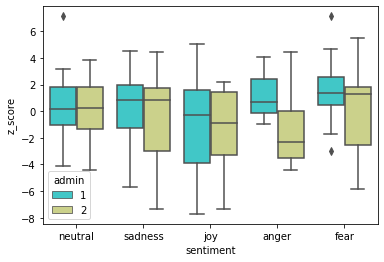

In [145]:
sns.boxplot(x='sentiment',y='gang',data=df,hue='admin',palette='rainbow')
plt.ylabel('z_score')

Text(0, 0.5, 'risk')

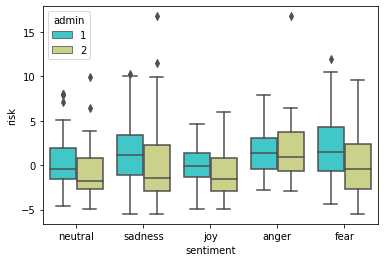

In [146]:
sns.boxplot(x='sentiment',y='risk',data=df,hue='admin',palette='rainbow')
plt.ylabel('risk')

In [75]:
df

,ID,Problem,Problem_Label,Strategy,Strategy_Label,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotional/behavior issues,referred him to in-house services through sea ...,Mentorship for school/job readiness,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
1,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotional/behavior issues,referred him to in-house services through sea ...,Mentorship for school/job readiness,2,17.0,1,1.0,-1.619353,-0.649773,0.524949,-1.745610
2,77th 1-16-81-1,low self esteem,Emotional/behavior issues,life skills- self love,Substance abuse/Anger management/Life skill class,1,18.0,2,1.0,0.564769,1.581231,NaN,-0.432885
3,77th 1-16-81-1,low self esteem,Emotional/behavior issues,life skills- self love,Substance abuse/Anger management/Life skill class,2,18.0,2,1.0,-2.870912,-0.007304,-1.015941,-2.667042
4,77th 1-16-95-1,client has girl drama at school with gossiping...,Emotional/behavior issues,one on one anger management skills,Substance abuse/Anger management/Life skill class,1,17.0,2,1.0,1.874593,-1.282688,NaN,2.209041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Southwest 2-23-277-1,client is currently on probation.,Emotional/behavior issues,cm developed a plan that client is to attend a...,Mentorship for school/job readiness,1,18.0,1,23.0,NaN,-1.701536,NaN,0.870485
3054,Southwest 2-23-278-1,client is currently on probation.,Emotional/behavior issues,cm has developed a plan for client to attend a...,Mentorship for school/job readiness,1,15.0,1,23.0,NaN,-3.189209,NaN,0.674581
3055,Southwest 2-23-279-1,client is currently on probation.,Emotional/behavior issues,cm will conducted workshops needed for client ...,Mentorship for school/job readiness,1,18.0,2,23.0,NaN,-0.818635,NaN,2.572766
3056,Southwest 2-23-280-1,client is currently on probation.,Emotional/behavior issues,cm will provide client with substance abuse wo...,Substance abuse/Anger management/Life skill class,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042


In [88]:
intake = df[df['admin']==1]
retest = df[df['admin']==2]
len(intake)

1883

In [42]:
intake = intake.drop_duplicates(subset = ["ID"])
len(intake)

0

In [137]:
stats.ttest_rel(intake[intake['sentiment']=='sadness']['risk'], 
                retest[retest['sentiment']=='sadness']['risk'])

Ttest_relResult(statistic=4.110366533081139, pvalue=0.00012585269528210077)

In [138]:
stats.ttest_rel(intake[intake['sentiment']=='fear']['risk'], 
                retest[retest['sentiment']=='fear']['risk'])

Ttest_relResult(statistic=3.4451444357353656, pvalue=0.0010776421517894685)

In [139]:
stats.ttest_rel(intake[intake['sentiment']=='anger']['risk'], 
                retest[retest['sentiment']=='anger']['risk'])

Ttest_relResult(statistic=-0.7534821357125655, pvalue=0.4757344833358852)

In [140]:
stats.ttest_rel(intake[intake['sentiment']=='worry']['risk'], 
                retest[retest['sentiment']=='worry']['risk'])

(nan, nan)

In [143]:
stats.ttest_rel(intake[intake['sentiment']=='joy']['risk'], 
                retest[retest['sentiment']=='joy']['risk'])

Ttest_relResult(statistic=2.3056724421250476, pvalue=0.03582918746854227)

In [142]:
stats.ttest_rel(intake[intake['sentiment']=='neutral']['risk'], 
                retest[retest['sentiment']=='neutral']['risk'])

Ttest_relResult(statistic=2.465380267179928, pvalue=0.02122416256582446)